# Save Individual Expression Profile Plots

# 📦 Imports and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


os.chdir('../../')
os.getcwd()

'd:\\Work\\Non PT\\Data Science\\BG\\mcrc-cetuximab-analysis'

In [2]:
os.makedirs("figures/profiles", exist_ok=True)

# 📥 Load expression and annotation data

In [6]:
# Load files
expression_df = pd.read_csv("data/log_tpms_from_fpkm_hgnc_filtered_by_ann.csv", index_col='sample_id')

expression_df_numeric = expression_df.select_dtypes(include=[float, int])

# 🖼️ Plot and save expression profiles (sample-wise)

In [7]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150

# Create individual distribution plots for each sample
for sample_id in expression_df_numeric.index:
    plt.figure(figsize=(8, 5))
    
    # Get expression values for this sample
    sample_data = expression_df_numeric.loc[sample_id]
    
    # Create plot
    ax = sns.histplot(sample_data, kde=True, bins=50, color='skyblue')
    
    # Customize plot
    ax.set_title(f'Gene Expression Distribution\n{sample_id}', pad=20)
    ax.set_xlabel('log2(TPM + 1)')
    ax.set_ylabel('Frequency')
    
    # Save with sample_id as filename
    filename = f"{sample_id}_expression_profile.png".replace(" ", "_")
    plt.savefig(os.path.join("figures/profiles", filename), bbox_inches='tight')
    plt.close()
    
    print(f"Created: {filename}")

print(f"\nSuccessfully created {len(expression_df_numeric)} expression profile plots in figures/profiles")

Created: 18R649_0010_expression_profile.png
Created: 18R654_0015_expression_profile.png
Created: 18R669_0001_expression_profile.png
Created: 18R670_0002_expression_profile.png
Created: 18R674_0006_expression_profile.png
Created: 18R678_0010_expression_profile.png
Created: 18R683_0015_expression_profile.png
Created: 18R694_0002_expression_profile.png
Created: 18R699_0007_expression_profile.png
Created: 18R700_0008_expression_profile.png
Created: 18R429_0009_expression_profile.png
Created: 18R298_0010_expression_profile.png
Created: 18R647_0008_expression_profile.png
Created: 18R648_0009_expression_profile.png
Created: 18R295_0003_expression_profile.png
Created: 18R296_0008_expression_profile.png
Created: 18R178_0022_expression_profile.png
Created: 18R177_0021_expression_profile.png
Created: 18R299_0025_expression_profile.png
Created: 18R300_0027_expression_profile.png
Created: 18R659_0020_expression_profile.png
Created: 18R661_0021_expression_profile.png
Created: 18R301_0002_expression_

In [10]:
# Check max value in this sample
print(f"Max value: {expression_df_numeric.loc['18R695_0003'].max()}")
# Verify log-transformation
print(f"Pre-log distribution:\n{expression_df_numeric.loc['18R695_0003'].describe()}")

Max value: 12.382231806575822
Pre-log distribution:
count    19388.000000
mean         2.083073
std          1.948003
min          0.000000
25%          0.264948
50%          1.695396
75%          3.409533
max         12.382232
Name: 18R695_0003, dtype: float64


(0.0, 100.0)

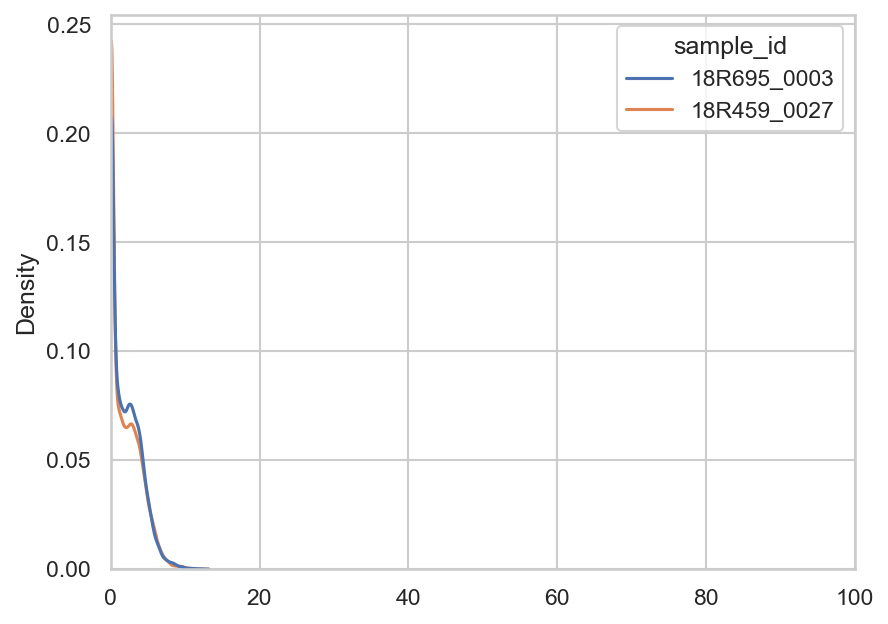

In [11]:
sns.kdeplot(data=expression_df_numeric.loc[['18R695_0003', '18R459_0027']].T)
plt.xlim(0, 100)